In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline
#data=pd.read_csv('summer.csv')
#Sports_Medals=pd.concat([data,pd.get_dummies(data['Medal'])],axis=1)

In [2]:
data=pd.read_csv('summer.csv')

In [3]:
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
data.isnull().any()

Year          False
City          False
Sport         False
Discipline    False
Athlete       False
Country        True
Gender        False
Event         False
Medal         False
dtype: bool

In [5]:
Sports_Medals=pd.concat([data,pd.get_dummies(data['Medal'])],axis=1)

# Summer Olympics Data Analysis Assignment

### 1. In how many cities Summer Olympics is held so far?

In [6]:
names_of_cities=data['City'].unique()
number_of_cities=len(names_of_cities)
print('\nNumber of cities in which summer olympics held so far = ',number_of_cities)
print('Names of those cities: ',names_of_cities)


Number of cities in which summer olympics held so far =  22
Names of those cities:  ['Athens' 'Paris' 'St Louis' 'London' 'Stockholm' 'Antwerp' 'Amsterdam'
 'Los Angeles' 'Berlin' 'Helsinki' 'Melbourne / Stockholm' 'Rome' 'Tokyo'
 'Mexico' 'Munich' 'Montreal' 'Moscow' 'Seoul' 'Barcelona' 'Atlanta'
 'Sydney' 'Beijing']


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [7]:
Sports_Gold=Sports_Medals.groupby(['Sport']).sum()[['Gold']].sort_values('Gold',ascending=False).reset_index()
#Sports_Medals.drop(['Year'],axis=1,inplace=True)
#Sports_Gold=Sports_Medals.drop(['Bronze','Silver'],axis=1)
Total_Gold_Medals=Sports_Gold['Gold'].sum()
Sports_Gold_Top_5=Sports_Gold.head()
lst=[]
for i in range(Sports_Gold_Top_5.shape[0]):
    lst.append(Sports_Gold_Top_5.iloc[i][0])
print('Sport having most number of Gold Medals so far: ',lst)

Sport having most number of Gold Medals so far:  ['Aquatics', 'Athletics', 'Rowing', 'Gymnastics', 'Fencing']


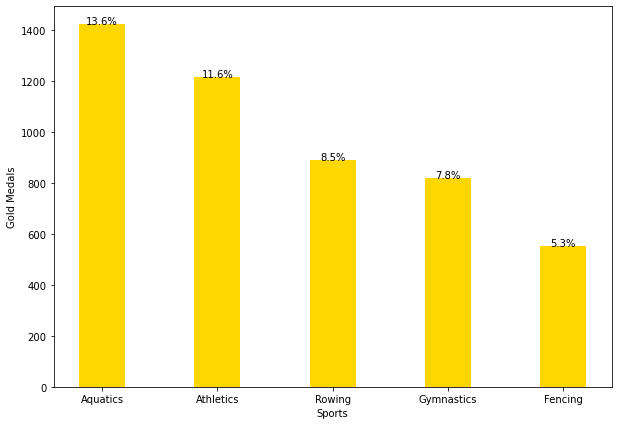

In [8]:
fig = plt.figure(figsize = (10, 7))
plt.bar(Sports_Gold_Top_5['Sport'], Sports_Gold_Top_5['Gold'], color ='Gold',width = 0.4)
plt.xlabel('Sports')
plt.ylabel('Gold Medals')
for i in range (Sports_Gold_Top_5.shape[0]):
    count = Sports_Gold_Top_5.iloc[i][1]
    percentage = '{:0.1f}'.format(100*count/Total_Gold_Medals)
    percentage += '%'
    plt.text(i, count, percentage, ha='center', color='black')

### 3. Which sport is having most number of medals so far? (Top 5)

In [9]:
Sports_Total_Medals=Sports_Medals.groupby(['Sport']).sum()[['Gold','Silver','Bronze']].reset_index()
Sports_Total_Medals['Total Medals']=Sports_Total_Medals['Gold']+Sports_Total_Medals['Bronze']+Sports_Total_Medals['Silver']
Sports_Total_Medals=Sports_Total_Medals.sort_values('Total Medals',ascending=False)
Total_Number_Of_Medals=Sports_Total_Medals['Total Medals'].sum()
Sports_Medals_Top_5=Sports_Total_Medals.head()
lst1=[]
for i in range(Sports_Medals_Top_5.shape[0]):
    lst1.append(Sports_Medals_Top_5.iloc[i][0])
print('Sport having most number of Medals so far: ',lst1)

Sport having most number of Medals so far:  ['Aquatics', 'Athletics', 'Rowing', 'Gymnastics', 'Fencing']


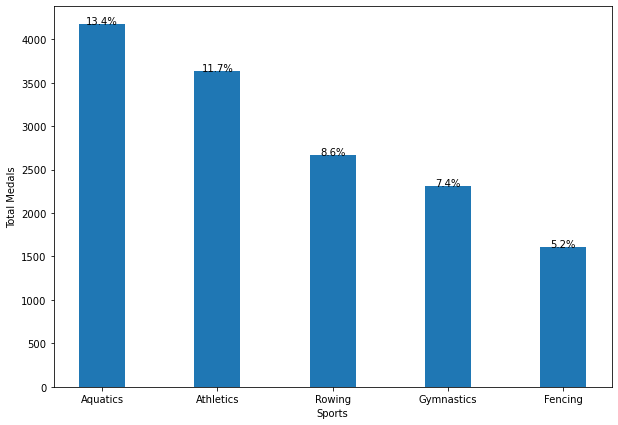

In [10]:
fig = plt.figure(figsize = (10, 7))
plt.bar(Sports_Medals_Top_5['Sport'], Sports_Medals_Top_5['Total Medals'], color =sb.color_palette()[0],width = 0.4)
plt.xlabel('Sports')
plt.ylabel('Total Medals')
for i in range (Sports_Medals_Top_5.shape[0]):
    count = Sports_Medals_Top_5.iloc[i][4]
    percentage = '{:0.1f}'.format(100*count/Total_Number_Of_Medals)
    percentage += '%'
    plt.text(i, count, percentage, ha='center', color='black')

### 4. Which player has won most number of medals? (Top 5)

In [11]:
Player_Medal=Sports_Medals.groupby(['Athlete']).sum()[['Gold','Silver','Bronze']].reset_index()
Player_Medal['Total Medal']=Player_Medal['Gold']+Player_Medal['Bronze']+Player_Medal['Silver']
Player_Medal=Player_Medal.sort_values('Total Medal',ascending=False)
Player_Medal_Top_5=Player_Medal.iloc[0:5]
lst2=[]
for i in range(Player_Medal_Top_5.shape[0]):
    lst2.append(Player_Medal_Top_5.iloc[i][0])
print('Athletes having most number of Medals so far: ',lst2)

Athletes having most number of Medals so far:  ['PHELPS, Michael', 'LATYNINA, Larisa', 'ANDRIANOV, Nikolay', 'MANGIAROTTI, Edoardo', 'ONO, Takashi']


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

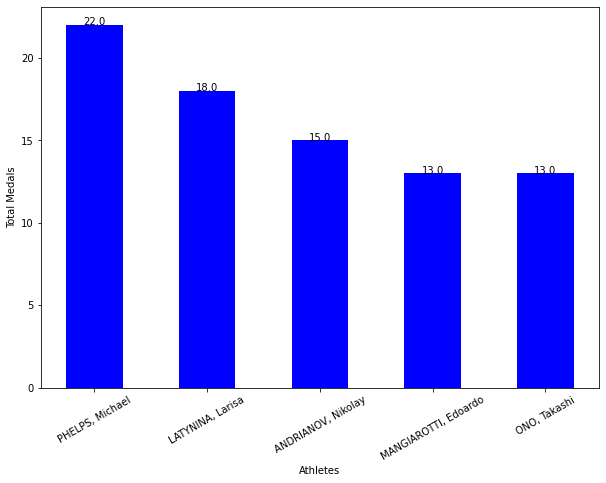

In [12]:
fig = plt.figure(figsize = (10, 7))
plt.bar(Player_Medal_Top_5['Athlete'], Player_Medal_Top_5['Total Medal'], color ='Blue',width = 0.5)
plt.xlabel('Athletes')
plt.ylabel('Total Medals')
for i in range (Player_Medal_Top_5.shape[0]):
    count = Player_Medal_Top_5.iloc[i][4]
    number = '{:0.1f}'.format(count)
    plt.text(i, count, number, ha='center', color='Black')
plt.xticks(rotation=30)


### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [13]:
Player_Gold=Sports_Medals.groupby(['Athlete']).sum()[['Gold']].sort_values('Gold',ascending=False).reset_index()
Player_Gold_Top_5=Player_Gold.iloc[0:5]
Player_Gold_Top_5
lst3=[]
for i in range(Player_Gold_Top_5.shape[0]):
    lst3.append(Player_Gold_Top_5.iloc[i][0])
print('Athletes having most number of Gold Medals so far: ',lst3)

Athletes having most number of Gold Medals so far:  ['PHELPS, Michael', 'NURMI, Paavo', 'LATYNINA, Larisa', 'SPITZ, Mark', 'LEWIS, Carl']


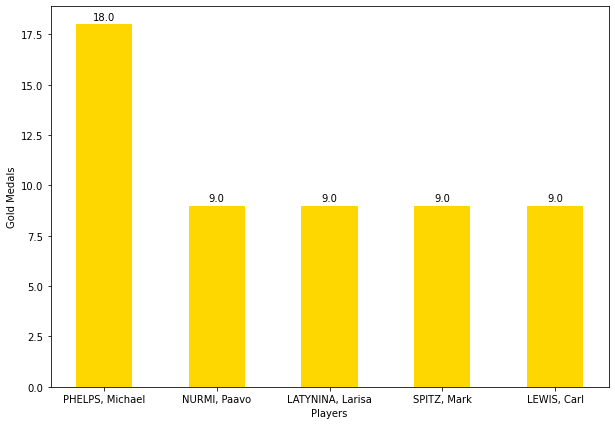

In [14]:
fig = plt.figure(figsize = (10, 7))
plt.bar(Player_Gold_Top_5['Athlete'], Player_Gold_Top_5['Gold'], color ='Gold',width = 0.5)
plt.xlabel('Players')
plt.ylabel('Gold Medals')
for i in range (Player_Gold_Top_5.shape[0]):
    count = Player_Gold_Top_5.iloc[i][1]
    number = '{:0.1f}'.format(count)
    plt.text(i, count+0.2, number, ha='center', color='black')

### 6. In which year India won first Gold Medal in Summer Olympics?

In [15]:
First_Gold=Sports_Medals.query('Country == "IND"')
First_Gold=First_Gold.query('Gold == 1')
First_Gold.sort_values('Year')
First_Gold_Year=First_Gold.iloc[0]
#First_Gold_Year=First_Gold['Year'].iloc[0]
print('India won its first Gold Medal in Summer Olympics in year : ',First_Gold_Year['Year'])

India won its first Gold Medal in Summer Olympics in year :  1928


### 7. Which sport is having most female Gold Medalists? (Top 5)

In [18]:
#Substitute Way to filter the data 
Gold_Medals=data[data['Medal'] == 'Gold']
Female_Gold = Gold_Medals[Gold_Medals['Gender']=='Women']
Total_Female_Gold=len(Female_Gold['Medal'])
temp=[]
for i in Female_Gold['Sport'].unique():
    size=len(Female_Gold[Female_Gold['Sport']==i])
    temp.append([i,size])
#Get the Filtered data in form of a list converting list to dataframe now
Female_Gold= pd.DataFrame(temp, columns=['Sport', 'Gold']).sort_values('Gold', ascending=False)
Female_Gold_Top_5=Female_Gold.head()
print('Sports having most number of Female Athletes Gold Medalists so far: ',list(Female_Gold_Top_5['Sport']))

Sports having most number of Female Athletes Gold Medalists so far:  ['Aquatics', 'Athletics', 'Gymnastics', 'Rowing', 'Volleyball']


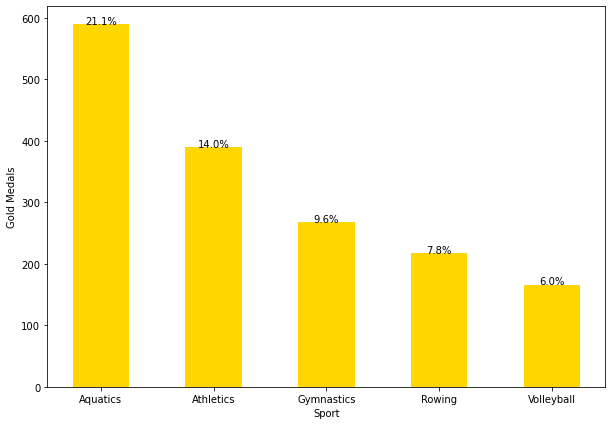

In [19]:
fig = plt.figure(figsize = (10, 7))
plt.bar(Female_Gold_Top_5['Sport'], Female_Gold_Top_5['Gold'], color ='Gold',width = 0.5)
plt.xlabel('Sport')
plt.ylabel('Gold Medals')
for i in range (Female_Gold_Top_5.shape[0]):
    count = Female_Gold_Top_5.iloc[i][1]
    percentage = '{:0.1f}'.format(100*count/Total_Female_Gold)
    percentage += '%'
    plt.text(i, count+0.2, percentage, ha='center', color='black')

### 8. Which event is most popular in terms on number of players? (Top 5)

In [16]:
Popular_Event=Sports_Medals.value_counts('Event')
Popularity=Popular_Event.sum()
Popular_Event_Top_5=Popular_Event.iloc[0:5]
print('Most Popular Events in Summer Olympics: ',list(Popular_Event_Top_5.index))
#Can be printed searately in different line as well using for loop

Most Popular Events in Summer Olympics:  ['Football', 'Hockey', 'Team Competition', 'Basketball', 'Handball']


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Football'),
  Text(1, 0, 'Hockey'),
  Text(2, 0, 'Team Competition'),
  Text(3, 0, 'Basketball'),
  Text(4, 0, 'Handball')])

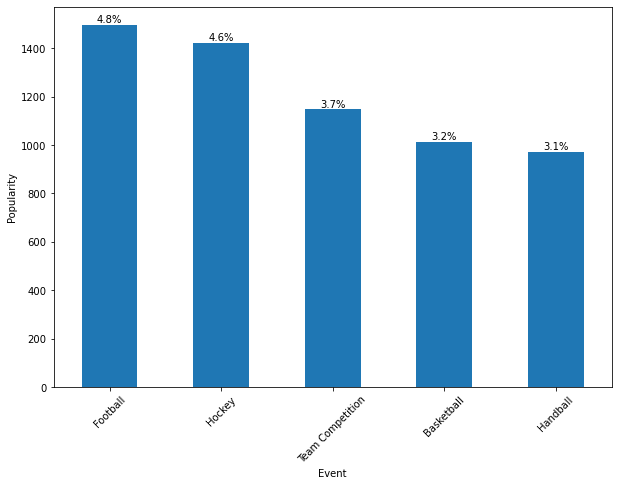

In [17]:
fig = plt.figure(figsize = (10, 7))
Popular_Event_Top_5.plot(kind='bar')
plt.xlabel('Event')
plt.ylabel('Popularity')
for i in range (Popular_Event_Top_5.shape[0]):
    count = Popular_Event_Top_5[i]
    popular = '{:0.1f}'.format(100*(count/Popularity))
    popular += '%'
    plt.text(i, count+10, popular, ha='center', color='black')
plt.xticks(rotation=45)